## Load Data and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [3]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.shape

(12330, 18)

## Data Analysis

### 1.Missing Values

In [5]:
any(dataset.isnull().sum())

False

##### No Missing values

### 2.Analysing BounceRate and ExitRates

#### For all pageviews to the page, Exit Rate is the percentage that were the last in the session.

#### For all sessions that start with the page, Bounce Rate is the percentage that were the only one of the session. 

#### Bounce Rate for a page is based only on sessions that start with that page.

In [6]:
Products_with_Highest_BounceRates =dataset.groupby(['ProductRelated']).mean()[['ProductRelated_Duration','BounceRates','ExitRates','PageValues']].sort_values('BounceRates',ascending=False)

In [7]:
Products_with_Highest_BounceRates.head()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues
ProductRelated,,,,
1,16.759474,0.172594,0.183541,0.170681
0,0.000000,0.098158,0.127446,0.000000
2,62.648883,0.048856,0.104933,0.846367
3,117.771305,0.033990,0.077767,1.657080
377,11729.408040,0.032877,0.045246,0.000000


##### When the user lands on pages of above products he is likely to leave the website

In [8]:
# How I derived the code below
# plot1_Region_analysis = dataset.groupby(['Region']).mean()[['BounceRates','ExitRates']].reset_index()

# plot1_Region_analysis.columns

# plot1_Region_analysis2 = pd.melt(plot1_Region_analysis, id_vars="Region", var_name="Parameters", value_name="Values")
# plot1_Region_analysis2

# plt.rcParams['figure.figsize']=(10,10)

# import seaborn as sns
# import matplotlib.pylab as plt2

# g =sns.factorplot(x='Region', y='Values',hue ='Parameters', data=plot1_Region_analysis2, kind='bar',legend=False,size=7)
# g.set_xticklabels(fontsize='20')
# g.set_yticklabels(fontsize='20')
# g.set_xlabels(fontsize='20')
# g.set_ylabels(fontsize='20')
# g.add_legend(fontsize='20')


In [9]:
#col should be less than 15 categories 
def plot_multiple_bar(col,list_of_measures,dataframe):
    import seaborn as sns
    import matplotlib.pylab as plt2
    import pandas as pd
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.factorplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,size =7)
    g.set_xticklabels(fontsize='20')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='20')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')


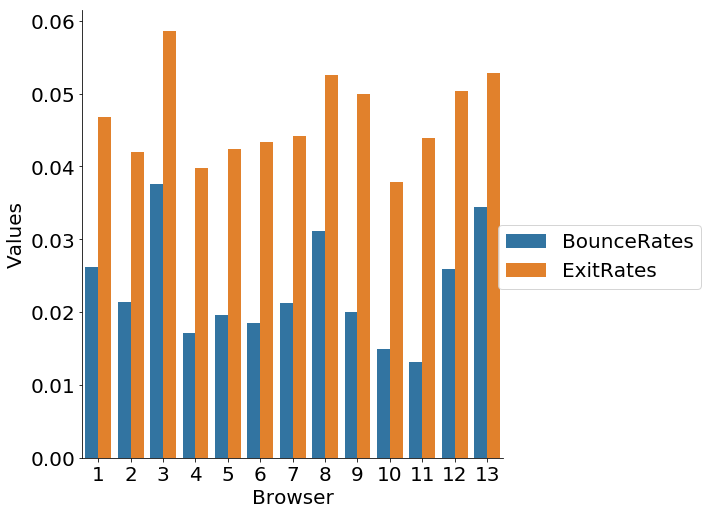

In [10]:
plot_multiple_bar('Browser',['BounceRates','ExitRates'],dataset)

<code>
Pages not getting rendered correctly maybe a cause for user to bounce off the website . 

From the above barplot it is clear that Browser 3 and Browser 13 have very high BounceRates as well as ExitRates.
</code>

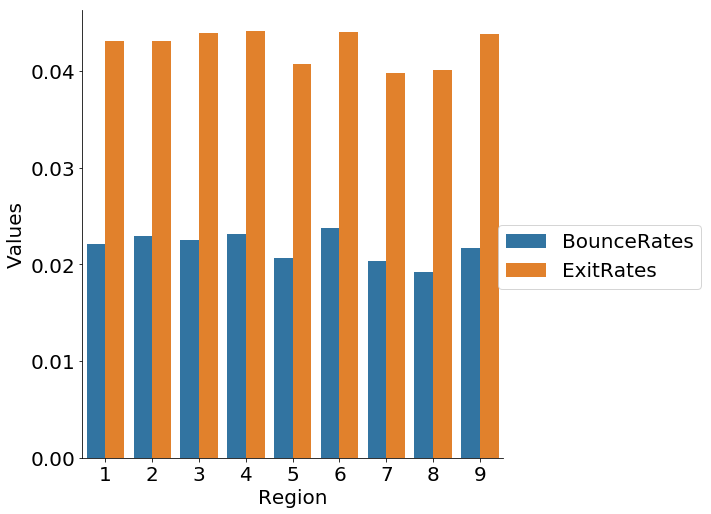

In [11]:
plot_multiple_bar('Region',['BounceRates','ExitRates'],dataset)

<code>
Not much sharp difference in BounceRates Regionwise
</code>

### 3.Page Value

#### This value is intended to give you an idea of which page in your site contributed more to your site's revenue.

In [12]:
dataset.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [13]:
dataset.groupby(['ProductRelated']).mean()[['PageValues','Revenue']].sort_values('PageValues',ascending=False).head(5)

,PageValues,Revenue
ProductRelated,,
205,177.528825,0.0
184,72.529615,0.0
318,45.155135,1.0
226,44.696428,1.0
139,35.999813,0.2


### 4. Revenue based Analysis

In [14]:
dataset[dataset.Revenue==True].groupby(['ProductRelated']).size().sort_values(ascending=False).head(10)

ProductRelated
10    50
13    45
22    44
14    43
21    42
19    42
8     42
17    40
12    40
15    40
dtype: int64

Products 10,13,22,14,21,19,8,17,12,15 contribute higher to Revenue

In [15]:
dataset.loc[(dataset.VisitorType=='New_Visitor') & (dataset.Revenue==True)].groupby(['ProductRelated']).size().sort_values(ascending=False).head(10)
# .groupby(['VisitorType']).size().sort_values(ascending=False).head(10)

ProductRelated
10    20
16    19
7     18
13    18
12    17
14    17
21    16
17    16
8     15
27    12
dtype: int64

Products 10,16,7,13,12,14,21,17,8,27 generate revenue among new users

In [16]:
dataset.loc[(dataset.VisitorType=='Returning_Visitor') & (dataset.Revenue==True)].groupby(['ProductRelated']).size().sort_values(ascending=False).head(10)

ProductRelated
22    33
19    33
20    31
10    30
15    29
8     27
28    26
13    26
30    26
21    26
dtype: int64

Products 22,19,20,10,15,8,28,13,30,21 generate revenue among Returning users.

### Statistical Analysis

In [17]:
corr_df =dataset.corr()

In [18]:
for index,rows in corr_df.iterrows():
    for i in rows.index.tolist():
        if index != i and abs(rows[i])>0.5:
            print(index ,'=>',i,":",rows[i])

Administrative => Administrative_Duration : 0.6015833421250285
Administrative_Duration => Administrative : 0.6015833421250285
Informational => Informational_Duration : 0.618954861781397
Informational_Duration => Informational : 0.618954861781397
ProductRelated => ProductRelated_Duration : 0.8609268361763887
ProductRelated_Duration => ProductRelated : 0.8609268361763887
BounceRates => ExitRates : 0.9130043961814553
ExitRates => BounceRates : 0.9130043961814553


### Class Imbalance Issue

In [19]:
dataset.Revenue.value_counts()/dataset.shape[0]

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

##### Class Imbalance does exist

### Prepare Data

In [20]:
dataset['Revenue'] = dataset['Revenue'].map({True:1,False:0})

In [21]:
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [22]:
dataset = pd.get_dummies(dataset)

In [23]:
X =dataset[dataset.columns.difference(['Revenue'])]
y =dataset.Revenue

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [25]:
X_train.shape , X_test.shape ,y_train.shape ,y_test.shape

((8631, 28), (3699, 28), (8631,), (3699,))

## Model Building 

### Decision Tree

#### Model 1 

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
dt_train_pred = dt.predict(X_train)

dt_test_pred = dt.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,dt_train_pred))
print("Precision:",precision_score(y_train,dt_train_pred))
print("Recall:",recall_score(y_train,dt_train_pred))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred))
print("Precision:",precision_score(y_test,dt_test_pred))
print("Recall:",recall_score(y_test,dt_test_pred))


Training Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Test Metrics
Accuracy: 0.8518518518518519
Precision: 0.5504132231404959
Recall: 0.5467980295566502


In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.7293860697945065

In [30]:
from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred))


Test Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3090
           1       0.55      0.55      0.55       609

   micro avg       0.85      0.85      0.85      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.85      0.85      0.85      3699



##### Conclusion - Bad performance on test , overfittting poor performance on test set and bad precision and recall for class 1

#### Model 2

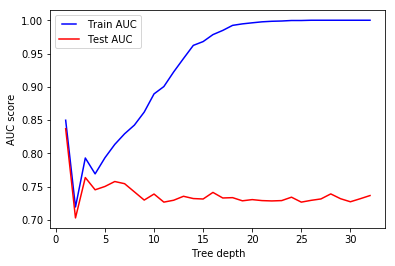

In [31]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:    
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(max_depth=5,min_samples_split=0.3)

dt2.fit(X_train,y_train)

dt_train_pred2 = dt2.predict(X_train)

dt_test_pred2 = dt2.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,dt_train_pred2))
print("Precision:",precision_score(y_train,dt_train_pred2))
print("Recall:",recall_score(y_train,dt_train_pred2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred2))
print("Precision:",precision_score(y_test,dt_test_pred2))
print("Recall:",recall_score(y_test,dt_test_pred2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)


Training Metrics
Accuracy: 0.875680685899664
Precision: 0.559915164369035
Recall: 0.812933025404157
Test Metrics
Accuracy: 0.8678021086780211
Precision: 0.5710900473933649
Recall: 0.7914614121510674
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3090
           1       0.57      0.79      0.66       609

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.89      0.87      0.88      3699

Roc -Auc Curve 0.8371546542955984


##### Conclusion :Adding max_depth=5,min_samples_split=0.3 curbed the overfitting and improved the test scores 

#### Model 3

In [33]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(max_depth=5,min_samples_split=40)

dt3.fit(X_train_bal,y_train_bal)

dt_train_pred3 = dt3.predict(X_train_bal)

dt_test_pred3 = dt3.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,dt_train_pred3))
print("Precision:",precision_score(y_train_bal,dt_train_pred3))
print("Recall:",recall_score(y_train_bal,dt_train_pred3))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred3))
print("Precision:",precision_score(y_test,dt_test_pred3))
print("Recall:",recall_score(y_test,dt_test_pred3))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred3))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_test_pred3)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)


Training Metrics
Accuracy: 0.9300327332242226
Precision: 0.9235626007522837
Recall: 0.937670485542826
Test Metrics
Accuracy: 0.8826709921600433
Precision: 0.6220362622036262
Recall: 0.7323481116584565
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3090
           1       0.62      0.73      0.67       609

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.89      0.88      0.89      3699

Roc -Auc Curve 0.8223229231431441


##### Conclusion: F1 score has improved over the previous model


<table style="border:2px solid black;width:50%;" align="left">
<tr style="font-weight:bold;font-size:12px"><b><td>Model</td><td>ROC-AUC</td><td>F1 Score(Class 1)</td></b></tr>
<tr style="font-weight:bold;font-size:12px"><td>1</td><td>0.72938</td><td>0.55</td></tr>
<tr style="font-weight:bold;font-size:12px"><td>2</td><td>0.83715</td><td>0.66</td></tr>
<tr style="font-weight:bold;font-size:12px"><td>3</td><td>0.82232</td><td>0.67</td></tr>
</table>

### Random Forest

#### Model 1

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123,n_estimators=500)

rf_model.fit(X_train,y_train)

rf_train_pred1= rf_model.predict(X_train)

rf_test_pred1 = rf_model.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,rf_train_pred1))
print("Precision:",precision_score(y_train,rf_train_pred1))
print("Recall:",recall_score(y_train,rf_train_pred1))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,rf_test_pred1))
print("Precision:",precision_score(y_test,rf_test_pred1))
print("Recall:",recall_score(y_test,rf_test_pred1))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,rf_test_pred1))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)


Training Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Test Metrics
Accuracy: 0.8891592322249257
Precision: 0.7330210772833724
Recall: 0.5139573070607554
Test Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3090
           1       0.73      0.51      0.60       609

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699

Roc -Auc Curve 0.7385320515886302


##### Conclusion :Overfitting to train set

#### Model 2

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model2 = RandomForestClassifier(random_state=123,n_estimators=700,min_samples_split=60,class_weight={0:0.20,1:0.80})

rf_model2.fit(X_train,y_train)

rf_train_pred2= rf_model2.predict(X_train)

rf_test_pred2 = rf_model2.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,rf_train_pred2))
print("Precision:",precision_score(y_train,rf_train_pred2))
print("Recall:",recall_score(y_train,rf_train_pred2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,rf_test_pred2))
print("Precision:",precision_score(y_test,rf_test_pred2))
print("Recall:",recall_score(y_test,rf_test_pred2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,rf_test_pred2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

Training Metrics
Accuracy: 0.9061522419186653
Precision: 0.6415749855240301
Recall: 0.852963818321786
Test Metrics
Accuracy: 0.8775344687753447
Precision: 0.5989847715736041
Recall: 0.7750410509031199
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3090
           1       0.60      0.78      0.68       609

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.78      0.84      0.80      3699
weighted avg       0.89      0.88      0.88      3699

Roc -Auc Curve 0.8363878393674175


##### Conclusion: Decent improvement over previous model using min_samples_split=60,class_weight={0:0.20,1:0.80}

<table style="border:2px solid black;width:50%;" align="left">
<tr style="font-weight:bold;font-size:12px"><b><td>Model</td><td>ROC-AUC</td><td>F1 Score(Class 1)</td></b></tr>
<tr style="font-weight:bold;font-size:12px"><td>1</td><td>0.73853</td><td>0.60</td></tr>
<tr style="font-weight:bold;font-size:12px"><td>2</td><td>0.83638</td><td>0.68</td></tr>
</table>

### Boosting 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)

gbm_model.fit(X_train,y_train)

gbm_train_pred= gbm_model.predict(X_train)

gbm_test_pred = gbm_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,gbm_train_pred))
print("Precision:",precision_score(y_train,gbm_train_pred))
print("Recall:",recall_score(y_train,gbm_train_pred))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,gbm_test_pred))
print("Precision:",precision_score(y_test,gbm_test_pred))
print("Recall:",recall_score(y_test,gbm_test_pred))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,gbm_test_pred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gbm_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

Training Metrics
Accuracy: 0.9395203336809176
Precision: 0.8627450980392157
Recall: 0.7113163972286374
Test Metrics
Accuracy: 0.8934847256015139
Precision: 0.7253668763102725
Recall: 0.5681444991789819
Test Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3090
           1       0.73      0.57      0.64       609

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699

Roc -Auc Curve 0.7628748385862547


### Preparing the data for Linear Models

In [42]:
X_train.head()

,Administrative,Administrative_Duration,BounceRates,Browser,ExitRates,Informational,Informational_Duration,Month_Aug,Month_Dec,Month_Feb,...,PageValues,ProductRelated,ProductRelated_Duration,Region,SpecialDay,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend
2476,5,626.000000,0.0,1,0.008228,1,66.0,0,0,0,...,41.925190,77,2660.150000,3,0.0,2,0,0,1,False
582,1,43.000000,0.0,2,0.005263,0,0.0,0,0,0,...,0.000000,37,1505.166667,4,0.0,8,1,0,0,False
10029,0,0.000000,0.0,5,0.022222,0,0.0,0,0,0,...,0.000000,9,258.291667,3,0.0,2,0,0,1,False
1154,0,0.000000,0.2,1,0.200000,0,0.0,0,0,0,...,0.000000,1,0.000000,1,0.0,9,0,0,1,True
1579,11,348.654762,0.0,2,0.002494,1,11.0,0,0,0,...,54.951269,64,1229.289286,1,0.0,2,1,0,0,False


In [43]:
X.dtypes

Administrative                     int64
Administrative_Duration          float64
BounceRates                      float64
Browser                            int64
ExitRates                        float64
Informational                      int64
Informational_Duration           float64
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct                          uint8
Month_Sep                          uint8
OperatingSystems                   int64
PageValues                       float64
ProductRelated                     int64
ProductRelated_Duration          float64
Region                             int64
SpecialDay                       float64
TrafficType                        int64
VisitorType_New_

In [44]:
X.Administrative = X.Administrative.astype('category')
X.Browser = X.Browser.astype('category')
X.Informational = X.Informational.astype('category')
X.ProductRelated = X.ProductRelated.astype('category')
X.Region = X.Region.astype('category')
X.TrafficType = X.TrafficType.astype('category')
X.OperatingSystems = X.OperatingSystems.astype('category')

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
X = pd.get_dummies(X)

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

X_train.shape , X_test.shape ,y_train.shape ,y_test.shape

((8631, 426), (3699, 426), (8631,), (3699,))

#### Model 1 

In [48]:
y_train.value_counts()/y_train.shape[0]

0    0.849496
1    0.150504
Name: Revenue, dtype: float64

In [49]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=123)

log_model.fit(X_train,y_train)

log_pred_train1 = log_model.predict(X_train)

log_pred_test1 =log_model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,log_pred_train1))
print("Precision:",precision_score(y_train,log_pred_train1))
print("Recall:",recall_score(y_train,log_pred_train1))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,log_pred_test1))
print("Precision:",precision_score(y_test,log_pred_test1))
print("Recall:",recall_score(y_test,log_pred_test1))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,log_pred_test1))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_pred_test1)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)


Training Metrics
Accuracy: 0.8868033831537481
Precision: 0.812015503875969
Recall: 0.32255581216320245
Test Metrics
Accuracy: 0.8623952419572858
Precision: 0.7314814814814815
Recall: 0.2594417077175698
Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3090
           1       0.73      0.26      0.38       609

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.80      0.62      0.65      3699
weighted avg       0.85      0.86      0.83      3699

Roc -Auc Curve 0.6203357405901764


##### Conclusion :Extremely Poor Recall and F1 score for class 1 

#### Model 2

In [51]:
y_train.value_counts()/y_train.shape[0]

0    0.849496
1    0.150504
Name: Revenue, dtype: float64

In [52]:
from sklearn.linear_model import LogisticRegression

log_model2 = LogisticRegression(random_state=123,class_weight={0:0.2,1:0.8},penalty='l1')

log_model2.fit(X_train,y_train)

log_pred_train2 = log_model2.predict(X_train)

log_pred_test2 =log_model2.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,log_pred_train2))
print("Precision:",precision_score(y_train,log_pred_train2))
print("Recall:",recall_score(y_train,log_pred_train2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,log_pred_test2))
print("Precision:",precision_score(y_test,log_pred_test2))
print("Recall:",recall_score(y_test,log_pred_test2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,log_pred_test2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_pred_test2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)


Training Metrics
Accuracy: 0.8786930830726452
Precision: 0.5776818742293465
Recall: 0.7213240954580447
Test Metrics
Accuracy: 0.8591511219248446
Precision: 0.5602739726027397
Recall: 0.6715927750410509
Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3090
           1       0.56      0.67      0.61       609

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.75      0.78      0.76      3699
weighted avg       0.87      0.86      0.86      3699

Roc -Auc Curve 0.7838546399477099


#### Model has improved tremendously by adding class weights and L1 penalty to the model

### Clustering data

#### Reduce Dimension using PCA

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

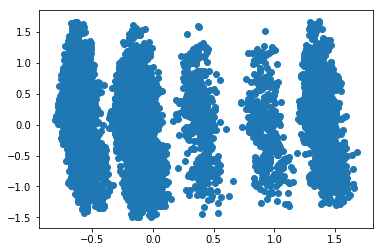

In [55]:
plt.scatter(x=principalDf['principal component 1'],y=principalDf['principal component 2'])

In [56]:
principalDf.head()

,principal component 1,principal component 2
0,1.462301,-1.065053
1,-0.522268,-0.171999
2,1.112239,-1.110162
3,-0.118212,-0.894743
4,0.473670,-0.591737


In [57]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [58]:
finalDf.head()

,principal component 1,principal component 2,Revenue
0,1.462301,-1.065053,0
1,-0.522268,-0.171999,0
2,1.112239,-1.110162,0
3,-0.118212,-0.894743,0
4,0.473670,-0.591737,0


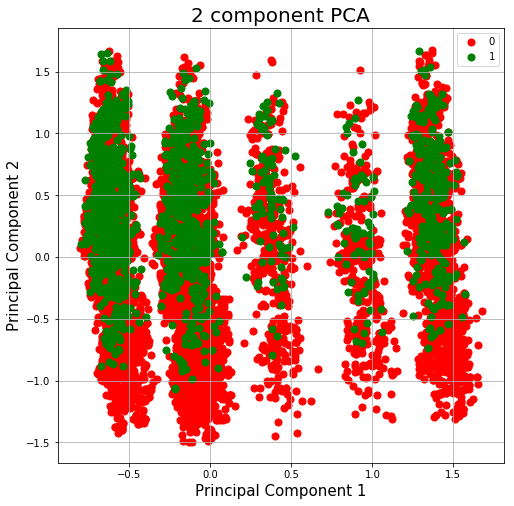

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Revenue'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Kmeans

Determine optimum k using Elbow Plot

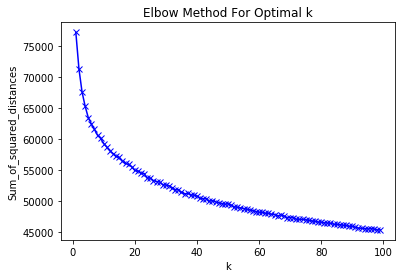

In [60]:
#Elbow Plot 

from sklearn.cluster import KMeans

ssd =[]

cluster_range= range(1,100)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(cluster_range, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [76]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [77]:
print(centroids)

[[ 2.42392343e-02  1.28803436e-01  2.30216862e-01 ...  2.80026991e-02
   2.00000000e+00 -1.60931174e-01]
 [ 2.25364030e-02  8.27068493e-02  1.94119149e-01 ...  1.17913832e-02
   1.00000000e+00 -1.10355253e-01]
 [ 2.62707052e-02  1.59658092e-01  2.50446032e-01 ...  1.34496547e-02
   4.50750548e-14 -1.57033806e-01]]


In [78]:
kmeans.inertia_

69056.6153351676

In [79]:
kmeans.labels_

array([0, 1, 0, ..., 2, 1, 2])

In [66]:
X['Cluster'] = pd.Series(kmeans.labels_)

In [67]:
X.head()

,Administrative_Duration,BounceRates,ExitRates,Informational_Duration,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Cluster
0,0.0,1.00,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.00,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,1.00,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.25,0.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.10,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X.groupby(['Cluster']).mean()[['Administrative_Duration','Informational_Duration','BounceRates', 'ExitRates', 'PageValues','Weekend','VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]

### DBSCAN

In [68]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.3, min_samples=10)

In [69]:
dbscan

DBSCAN(algorithm='auto', eps=2.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [70]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [71]:
np.unique(dbscan.labels_)

array([-1,  0], dtype=int64)

In [72]:
s1 =pd.Series(dbscan.labels_)

In [73]:
s1.value_counts()

 0    10691
-1     1639
dtype: int64

In [74]:
X['DbScanOutput'] = s1

In [75]:
X.groupby(['DbScanOutput']).mean()[['Administrative_Duration','Informational_Duration','BounceRates', 'ExitRates', 'PageValues','Weekend','VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]

,Administrative_Duration,Informational_Duration,BounceRates,ExitRates,PageValues,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
DbScanOutput,,,,,,,,,
-1,0.058791,0.050330,0.040203,0.114834,0.023862,0.300793,0.249542,0.006101,0.744356
0,0.018411,0.007879,0.121804,0.230776,0.015117,0.222149,0.120195,0.007015,0.872790


#### VisitorType 'Other' is clearly seperable from  new and returning visitor